In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm

import functions as fn


In [2]:
aqi_df = pd.read_csv("./monthly_aqi_data.csv")
aqi_df.head()


,district,month,aqi,year
0,Nizamabad,Jan,61.333333333333336,2017
1,Nizamabad,Feb,61.55555555555556,2017
2,Nizamabad,Mar,63.22222222222222,2017
3,Nizamabad,Apr,67.37037037037038,2017
4,Nizamabad,May,68.40740740740742,2017


In [3]:

aaq_df = pd.read_csv("./monthly_aaq_data.csv")
aaq_df.head()


,district,month,SO2,NOx,PM10,PM2.5,NH3,year
0,Khammam,Jan,6.0,19.0,46.0,NaN,NaN,2016
1,Khammam,Feb,7.0,19.0,51.0,NaN,NaN,2016
2,Khammam,Mar,6.1,20.7,54.0,NaN,NaN,2016
3,Khammam,Apr,8.0,19.0,51.0,NaN,NaN,2016
4,Khammam,May,7.0,19.0,47.0,NaN,NaN,2016


### Nizamabad
We'll be trying out 3 models to forecast AQI
1. ARIMA on AQI
2. ARIMAX on AQI with SO2, NOx and PM10 as exogenous variables
3. VARMAX on AQI, SO2, NOx and PM10.

The model giving the best result will be used for all other districts.


In [4]:
df = fn.combine_aqi_aaq(aqi_df=aqi_df, aaq_df=aaq_df, district="Nizamabad")
df.head()


,district,aqi,date,SO2,NOx,PM10
0,Nizamabad,61.333333,2017-01-01,5.0,20.0,61.0
1,Nizamabad,61.555556,2017-02-01,5.0,20.0,62.0
2,Nizamabad,63.222222,2017-03-01,5.0,21.0,63.0
3,Nizamabad,67.370370,2017-04-01,5.0,20.0,67.0
4,Nizamabad,68.407407,2017-05-01,5.0,20.0,68.0


<AxesSubplot:xlabel='date'>

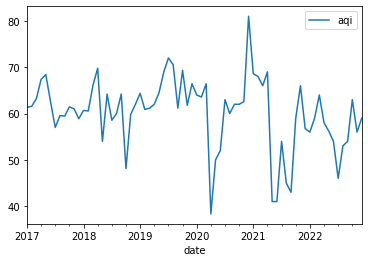

In [5]:
df.set_index("date", inplace=True)
df.plot(y='aqi')


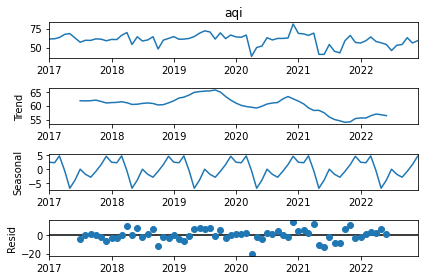

In [6]:
# seasonal decomposition
seasonal_decomp = sm.tsa.seasonal_decompose(df['aqi'], model='additive')
seasonal_decomp.plot()
plt.show()


In [7]:
holt_winter = sm.tsa.ExponentialSmoothing(
    df['aqi'], seasonal='add', seasonal_periods=12)
x = holt_winter.fit(smoothing_seasonal=0.1)
x.params


c:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.43148642186641106,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.1,
 'damping_trend': nan,
 'initial_level': 61.08540783457223,
 'initial_trend': nan,
 'initial_seasons': array([ 1.6224173 ,  1.17553908,  2.9715401 , -0.50545586, -4.9924536 ,
        -2.8863986 , -1.45917466, -1.50628557, -1.69878264,  0.94976517,
         1.44275655,  4.01478201]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

<AxesSubplot:xlabel='date'>

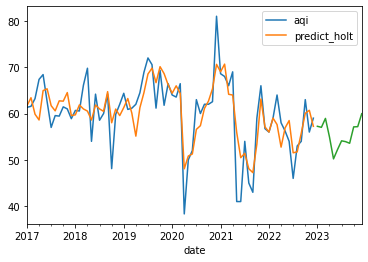

In [8]:
df['predict_holt'] = list(x.predict(1, len(df)))
df[['aqi', 'predict_holt']].plot()
x.forecast(12).plot()


In [9]:

sm.stats.acorr_ljungbox(x.resid, lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,20.849347,0.022169
